# Data Project

In this data project we analyze the evolution of US GDP and its four subcomponents covering the period from 2005 to 2017, extracting data from the FRED database. First, we describe the data using empirical moments. Moving on, we plot the raw time series in the same diagram to illustrate the upward trend. The interactive menu is used to inspect the series separately. Bar charts are constructed to illustrate the individual size differences of the four major demand components at three different selected points in time. Lastly, we transform the raw time series and plot the quarterly growth rates of total GDP and the four components to illustrate presence of business cycles and their cyclical nature.

In [1]:
# Importing packages:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader
import datetime
import ipywidgets as widgets
from ipywidgets import interact

In [2]:
start = datetime.datetime(2005, 1, 1)
end   = datetime.datetime(2017, 1, 1)

# Fetching data from the Federal Reserve's API
cons  = pandas_datareader.data.DataReader('PCEC', 'fred', start, end) # Private consumption
inv   = pandas_datareader.data.DataReader('GPDI', 'fred', start, end) # Investments
publ  = pandas_datareader.data.DataReader('FGEXPND', 'fred', start, end) # Government expenditures
exp   = pandas_datareader.data.DataReader('NETEXP', 'fred', start, end) # Net exports

In [3]:
# Merging data from FED to dataframe
data_merged = pd.merge(cons, inv, how = 'left', on = ['DATE'])

for i in exp, publ:
    # i. merging remaining variables to dataframe
    data_merged = pd.merge(data_merged, i, how = 'left', on = ['DATE'])
    
# Defining names for columns
variable = {} 
variable['PCEC']    = 'Private Consumption'
variable['FGEXPND'] = 'Government Expenditures'
variable['GPDI']    = 'Investment'
variable['NETEXP']  = 'Net Exports'

# Renaming columns and calculating GDP as the sum of the former variables
data_merged.rename(columns = variable, inplace=True)
data_merged['Gross Domestic Product'] = data_merged.sum(axis = 1)

In [4]:
data_merged.describe()

,Private Consumption,Investment,Net Exports,Government Expenditures,Gross Domestic Product
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,10681.419143,2653.241367,-585.892408,3531.172592,16279.940694
std,1244.921063,389.802704,117.696838,504.477351,2037.448460
min,8522.955000,1841.416000,-805.630000,2557.429000,12891.862000
25%,9760.216000,2476.474000,-703.687000,3062.772000,14705.146000
50%,10485.358000,2645.263000,-540.838000,3772.624000,15957.865000
75%,11573.881000,2910.546000,-509.981000,3873.071000,17807.559000
max,13114.118000,3278.613000,-338.611000,4228.332000,20044.501000


Our sample consists of time series of macroeconomic variables containing 49 quarterly observations. On average, GDP was 16,279.9 billion dollars throughout the period. The empirical distribution of GDP seems rather symmetric as the mean is located close to the 50th percentile. This observation is further supported by the relative size of the standard deviation compared to the mean; $\frac{2037.4}{16,279.9} = 0.125$.
Similar distributional patterns apply to the remaining components. 

Furthermore, we note that the net exports are negative for all observations due to the US importing more goods and services than exporting. The sum of the four demand components equals the GDP. 

In [13]:
# Creating an interactive figure with all time series


def draw(x):
    """ Function used in the interactive plot, showing either
        all series og chosen series.
    
    Args:
        x: series to plot
    
    Returns:
        plot: depending on chosen series, function returns a plot
        
    """

    
    if x == 'All': 
        figure = plt.figure()
        ax0    = data_merged.plot(grid = True)
        plt.xlabel('Year')
        plt.ylabel('Bil. $US (Current prices, seasonally adjusted)')
    else:  
        figure = plt.figure()
        ax0     = data_merged[x].plot(grid = True)
        plt.xlabel('Year')
        plt.ylabel('Bil. $US (Current prices, seasonally adjusted)')
        return plt.show() 

# Options for drop-down menu
Series = ['All', 'Gross Domestic Product', 'Private Consumption', 
          'Government Expenditures', 'Investment', 'Net Exports']    
interact(draw, x = Series)

interactive(children=(Dropdown(description='x', options=('All', 'Gross Domestic Product', 'Private Consumption…

<function __main__.draw(x)>

## Time series

As mentioned, GDP can be decomposed into four major components: private consumption, investment, government expenditures and net export. In the figure above, total GDP has been plotted along with its four subcomponents. 

From the figure it is clear that private consumption is by far the largest component, accounting for around two-thirds of total GDP. Investment and government expenditures are around the same size. Net exports are surely the smallest component of total GDP.

Considering only GDP using the drop-down menu, it is clear that GDP has been trending upwards and the growth rate appears to have been fairly constant. This is disregarding small fluctuations and ignoring the financial crisis around 2008.  
The financial crisis is evident in all series. Note however that net exports increases possibly due to a huge decline in national demand.

Government expenditures appear to be independent (if not counter-cyclical) of business cycles since public expenditure is often increased in an attempt to stimulate an economy in periods of contraction.

In [6]:
# Creating shares of total GDP
ratios = data_merged.copy()
choose = ('Private Consumption', 'Investment','Net Exports', 'Government Expenditures')
for var in choose:
    # i. calculating ratios of total GDP for each variable
    ratios[var]    = ratios[var]/ratios['Gross Domestic Product']*100

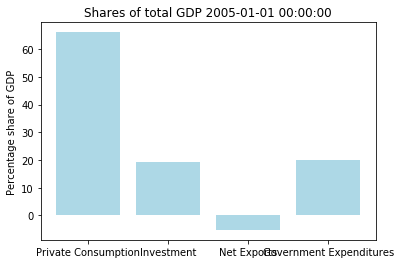

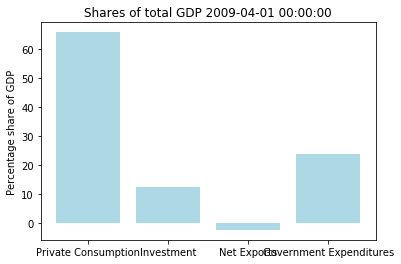

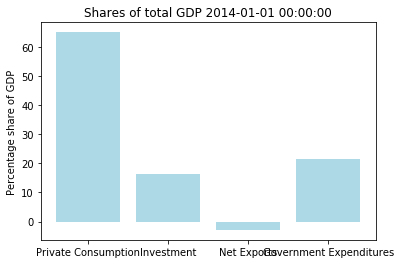

In [7]:
# Plotting shares of GDP at different points in time
objects = ('Private Consumption', 'Investment', 'Net Exports', 'Government Expenditures')
y_pos = np.arange(len(objects))

for i in 0, 17, 36:    
    # i. defining the input to the bar chart
    performance = [ratios['Private Consumption'][i], ratios['Investment'][i], 
                   ratios['Net Exports'][i], ratios['Government Expenditures'][i]]
    
    # ii. plotting the bar chart, naming labels and title
    plt.figure()
    plt.bar(y_pos, performance, align = 'center', color = 'lightblue')
    plt.xticks(y_pos, objects)
    plt.ylabel('Percentage share of GDP')
    plt.title('Shares of total GDP '+str(ratios.index[i]))

## Bar charts

The bar charts above provides a graphical presentation of the relative size of the four demand components. It is evident that private cosumption appear to account for approximately 2/3 of total GDP. Investment and government expenditures each accounts for close to 1/5 of total GDP whereas net exports contributes negatively. 

As it is apparent from the figures, the demand components to GDP ratios are relatively constant over time. 

In [8]:
data_merged_copy = data_merged.copy()

Liste = ['Gross Domestic Product', 'Private Consumption', 
         'Government Expenditures', 'Investment', 'Neat Exports']

for i in Liste:
    # i. percentage change of each variable
    data_merged_copy[i+'_Growth'] = data_merged_copy[i].pct_change()

# Multiplying 'Net Exports_Growth' column by -1 as we have learned that df.pct_change() 
# finds the right value but reversed (possibly due to the fact that Net Exports are negative).
data_merged_copy['Net Exports_Growth'] = data_merged_copy['Net Exports_Growth'].mul(-1)    
 
for i in Liste:    
    # i. mean of each variable
    data_merged_copy[i+' Mean'] = np.mean(data_merged_copy[i+'_Growth'])

KeyError: 'Neat Exports'

In [ ]:
# Plotting the quarterly growth rates seperately along with their mean
for i in Liste:
    plt.figure()
    plt.xlabel('Date')
    plt.ylabel('Quarterly Growth')
    ax1 = data_merged_copy[i+'_Growth'].plot(color='blue', grid = True, label = 'Quarterly growth')
    ax2 = data_merged_copy[i+' Mean'].plot(color='red', grid = True, label = 'Mean')
    plt.title(i+' (growth rate)')
    plt.show()
    

## Growth rates

The figures above display the quarterly growth rates of total GDP and its four underlying components. Furthermore, the mean growth rates has been plotted as the red horizontal line. As argued from the inspection of the time series plots earlier, all series but net exports have positive mean growth rates indicating a positive trend. 

The growth rates are all fluctuating around their mean values in a varying degree. The growth rates of total GDP and private consumption does not seem to surpass a numeric value of 2 percent, making these two series the least volatile. 

Government expenditures are somewhat more volatile and as argued above it is worth noting the sharp increase in expenditures around 2008 which could indicate an expansionary fiscal response the extreme fall in demand. 

Although the percentage deviations of net exports are larger than those of investment, investment is considered the most volatile demand component. Investment reaches a peak growth rate of 5 percent and a low of around 12 percent. Investment are in theory highly driven by stock prices which - to a large degree - are influenced by expectations. Fluctuations in expectations could be part of the reason for large observed volatility.  

The reason net exports appear so volatile is that it is a relatively small demand component and consists of imports and exports, both of which are usually considered less volatile than investments.

As mentioned, the fluctuations in investment and government expenditures are relatively large. However, due to their relative sizes they do not affect total GDP as much as private consumption. A point made in the description of the raw time series.